<a href="https://colab.research.google.com/github/dianazhu9879/LLM-Experimentation/blob/main/TQTResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries to find linear trend and plot data
from statsmodels import regression
import statsmodels.api as sm
import scipy.stats as stats
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.dates as mdates

In [ ]:
data = yf.download("AAPL", start="2017-01-20", end="2021-01-20")
print(data.head())
print(data.columns)

/tmp/ipython-input-3849334907.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2017-01-20", end="2021-01-20")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2017-01-20  27.658255  27.761972  27.596024  27.761972  130391600
2017-01-23  27.676695  27.844948  27.605243  27.658256   88200800
2017-01-24  27.651337  27.681299  27.543008  27.554533   92844000
2017-01-25  28.091560  28.142267  27.722784  27.755052  129510400
2017-01-26  28.105394  28.220637  28.027028  28.043162  105350400
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


/tmp/ipython-input-3722383844.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model.params[0] # Get coefficients of line
/tmp/ipython-input-3722383844.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model.params[1]
/tmp/ipython-input-3722383844.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Y_hat'] = X * b + a


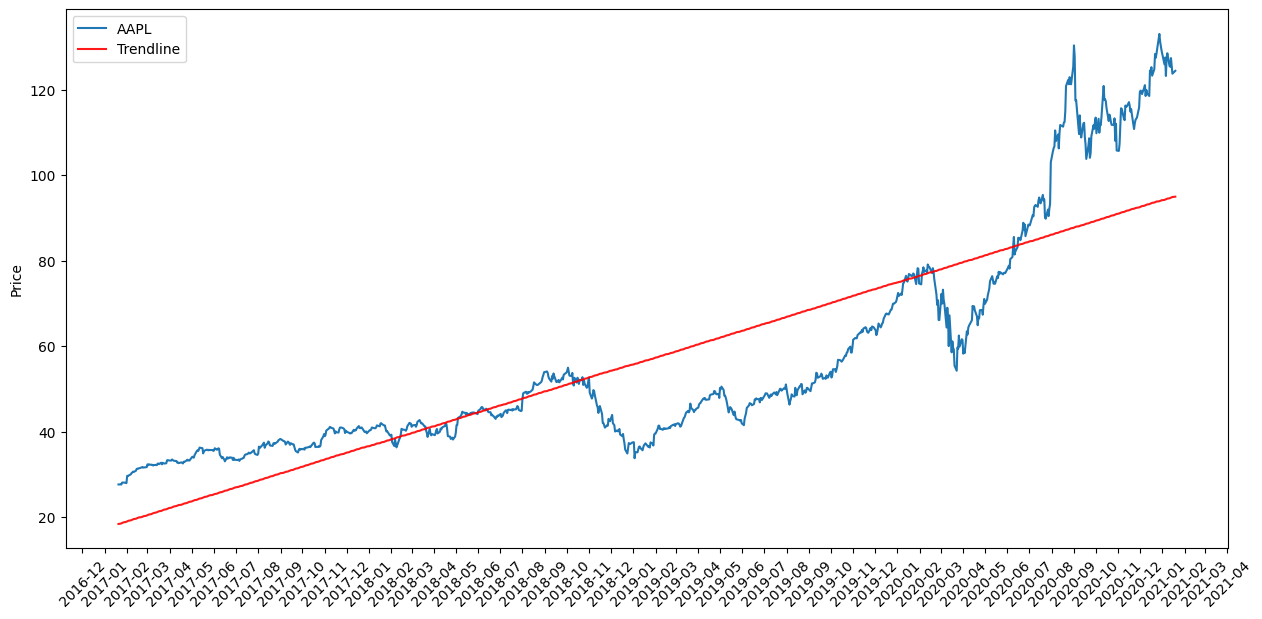

In [ ]:

# Load pricing data for an asset
start = '2014-01-01'
end = '2015-01-01'
prices = data['Close']
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params[0] # Get coefficients of line
b = model.params[1]
prices['Y_hat'] = X * b + a
plt.plot(prices['Y_hat'], 'r', alpha=0.9);
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline']);
plt.show()

This graph depicts Apple's stock in relation to time.
The hypothesis that we're making here is that the momentum of the stock is based on some upward trend seen by the linear model.


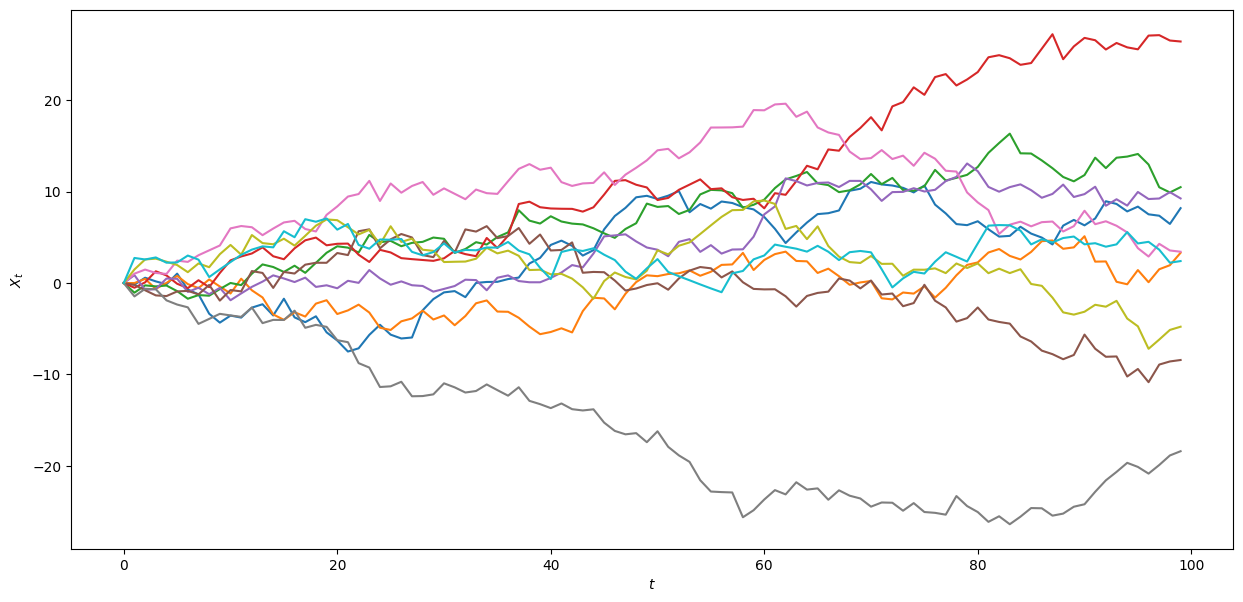

In [ ]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(N-1):
        X[i+1] = X[i] + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(100)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$');
plt.show()

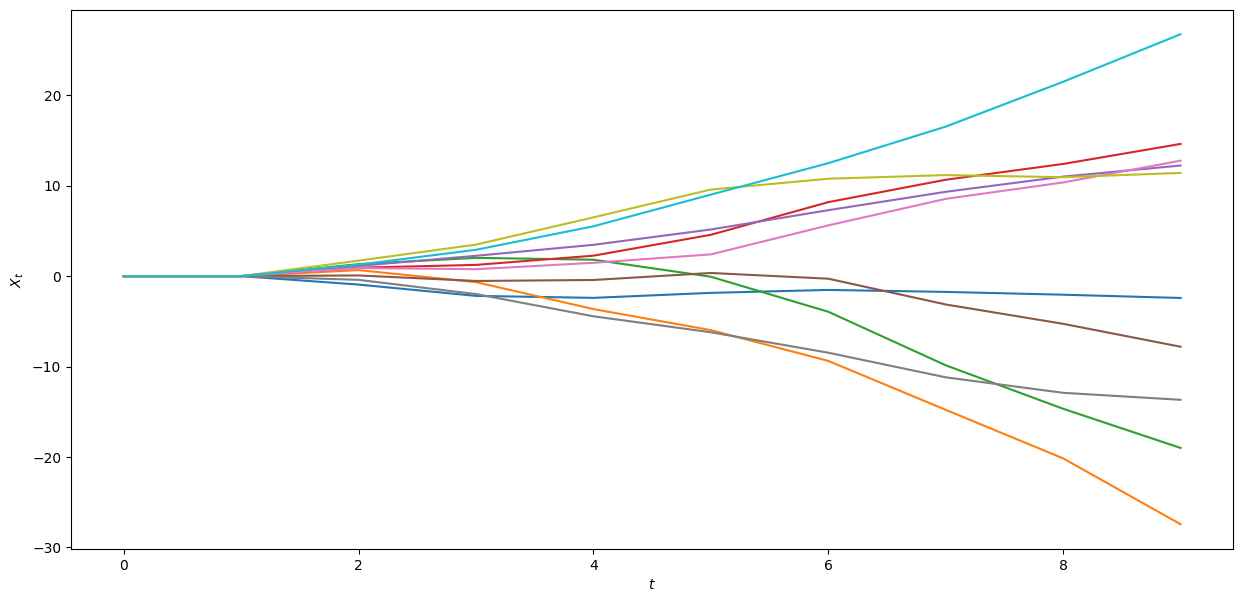

In [ ]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(1, N-1):
        # Do the past returns 'look good' to investors
        past_returns = X[i] - X[i-1]
        # Investors hypothesize that future returns will be equal to past returns and buy at that price
        X[i+1] = X[i] + past_returns + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(10)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$');
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

X1 = generate_autocorrelated_values(100)
X2 = np.random.normal(0, 1, 100)

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that yw has a unit root
print ('X1')
_, pvalue, _, _, _, _ = adfuller(X1)
if pvalue > 0.05:
    print('We cannot reject the null hypothesis that the series has a unit root.')
    print ('We reject the null hypothesis that the series has a unit root.')
print ('X2')
_, pvalue, _, _, _, _ = adfuller(X2)
if pvalue > 0.05:
    print ('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print ('We reject the null hypothesis that the series has a unit root.')

X1
We cannot reject the null hypothesis that the series has a unit root.
We reject the null hypothesis that the series has a unit root.
X2
We reject the null hypothesis that the series has a unit root.


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1623563116.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model.params[0] # Get coefficients of line
/tmp/ipython-input-1623563116.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model.params[1]
/tmp/ipython-input-1623563116.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

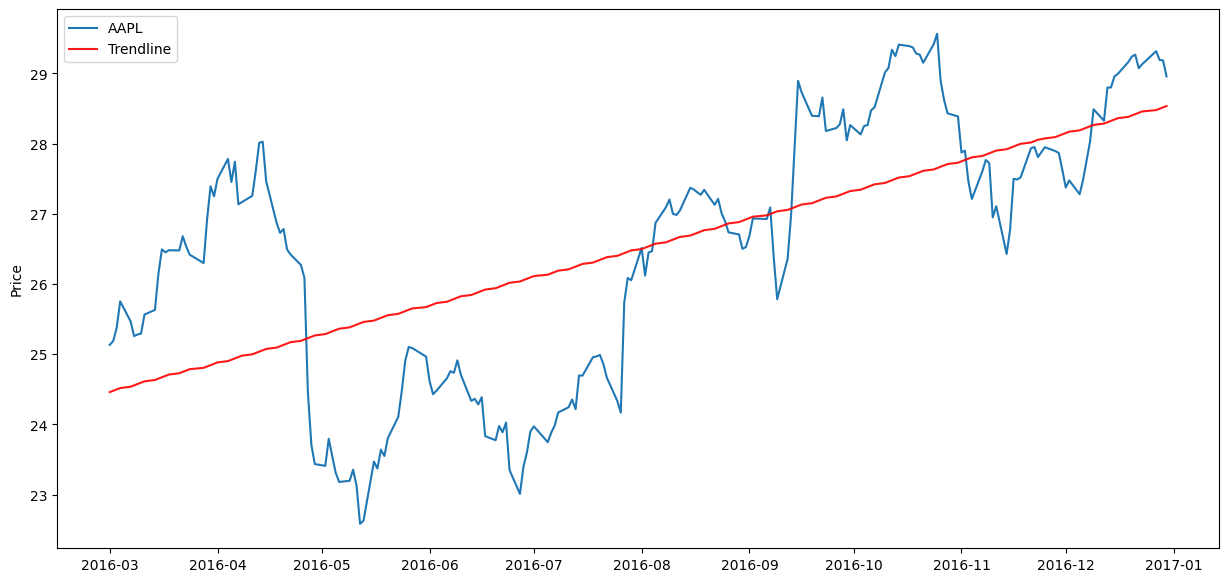

In [ ]:
# Load pricing data for an asset
start = '2016-03-01'
end = '2017-01-01'
data = yf.download("AAPL", start=start, end=end, auto_adjust=False)
prices = data['Close']
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params[0] # Get coefficients of line
b = model.params[1]
prices['Y_hat'] = X * b + a
plt.plot(prices['Y_hat'], 'r', alpha=0.9);
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline']);
plt.show()

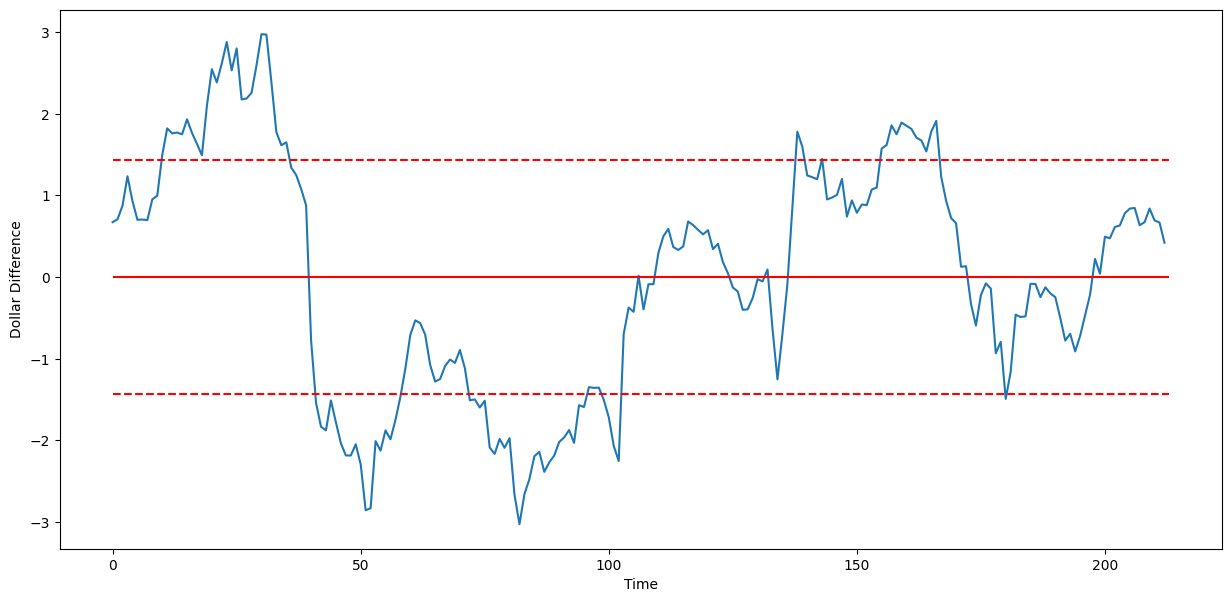

In [ ]:
plt.figure(figsize=(15,7))
plt.plot((prices['AAPL'] - prices['Y_hat']).values)
plt.hlines(np.mean(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r')
plt.hlines(np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.hlines(-np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.xlabel('Time')
plt.ylabel('Dollar Difference')
plt.show()